#Descrizione

Vengono testati diversi time steps, partendo da immagini croppate nella dimensione 128x64 e da immagini croppate nella dimensione 512x64.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#Import

In [ ]:
import tensorflow as tf
from tensorflow import keras as ks

from keras import backend as K

import numpy as np
import pandas as pd

import time
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from skimage.transform import resize

import cv2

#Data visualization
import seaborn as sns

from matplotlib import pyplot as plt

import glob
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os, os.path

#Per modello NN
'''
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Softmax
#from tensorflow.keras.layers import Dropout
#from tensorflow.keras.layers import Conv2D
'''
print(tf.__version__)

Using TensorFlow backend.


1.15.2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Modelli

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
!git clone https://github.com/PaoloDarienzo/NN_modules.git
!mv NN_modules/Defining_Methods.py /content
!rm -rf NN_modules

Cloning into 'NN_modules'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 63 (delta 29), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [ ]:
import Defining_Methods as my_lib

##Modello 128x64

In [ ]:
database_scelto = '18k' #or '14k' or '9k'

dim1 = 128
dim2 = 64
batch_size = 768

#Unit in first layer
num_units1 = 141
num_units2 = 94
channels = 1

time_steps = 1
n_features = int((dim1*dim2)/time_steps)

n_epochs = 100
patience= 10

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM, hist, time_callback = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist.history['loss'])

time_per_epoch = time_callback.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

###########################

time_steps = 2
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM2, hist2, time_callback2 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist2.history['loss'])

time_per_epoch = time_callback2.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM2.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

###########################

time_steps = 4
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM3, hist3, time_callback3 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist3.history['loss'])

time_per_epoch = time_callback3.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM3.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

###########################

time_steps = 8
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM4, hist4, time_callback4 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist4.history['loss'])

time_per_epoch = time_callback4.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM4.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

#########

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#########

time_steps = 16
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM5, hist5, time_callback5 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist5.history['loss'])

time_per_epoch = time_callback5.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM5.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

###########################

time_steps = 32
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM6, hist6, time_callback6 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist6.history['loss'])

time_per_epoch = time_callback6.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM6.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

###########################

time_steps = 64
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM7, hist7, time_callback7 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist7.history['loss'])

time_per_epoch = time_callback7.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM7.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

###########################

time_steps = 128
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM8, hist8, time_callback8 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist8.history['loss'])

time_per_epoch = time_callback8.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM8.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

18800
START IMAGE INPUT
END IMAGE INPUT
3008/3008 [==============================] - 2s 664us/sample - loss: 0.4844 - acc: 0.9102
Total epochs 47
54.07938742637634 s
18800
START IMAGE INPUT
END IMAGE INPUT
3008/3008 [==============================] - 4s 1ms/sample - loss: 0.4032 - acc: 0.9195
Total epochs 27
35.11034941673279 s
18800
START IMAGE INPUT
END IMAGE INPUT
3008/3008 [==============================] - 2s 697us/sample - loss: 0.4227 - acc: 0.9186
Total epochs 29
40.29475498199463 s
18800
START IMAGE INPUT
END IMAGE INPUT
3008/3008 [==============================] - 2s 700us/sample - loss: 0.4786 - acc: 0.9159
Total epochs 34
44.911738872528076 s
18800
START IMAGE INPUT
END IMAGE INPUT
3008/3008 [==============================] - 2s 716us/sample - loss: 0.4331 - acc: 0.9225
Total epochs 54
70.84602952003479 s
18800
START IMAGE INPUT
END IMAGE INPUT
3008/3008 [==============================] - 4s 1ms/sample - loss: 0.4802 - acc: 0.9169
Total epochs 74
109.51918983459473 s
18800


In [ ]:
storie_a_128 = list()
storie_a_128.append(hist)
storie_a_128.append(hist2)
storie_a_128.append(hist3)
storie_a_128.append(hist4)
storie_a_128.append(hist5)
storie_a_128.append(hist6)
storie_a_128.append(hist7)
storie_a_128.append(hist8)

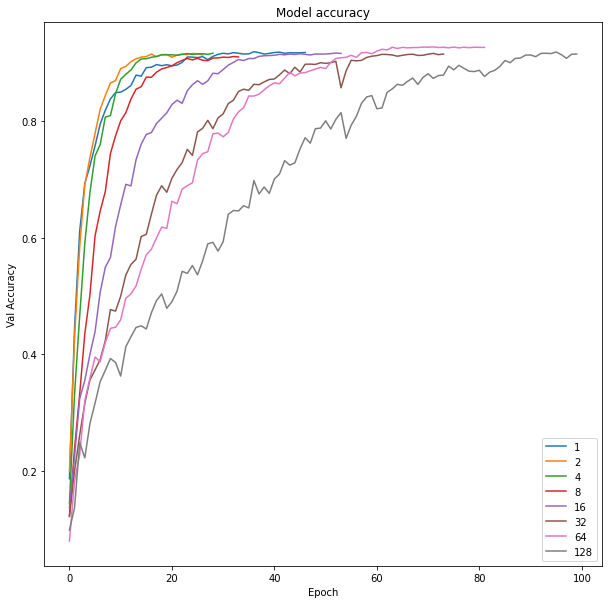

In [ ]:
#Plot training & validation accuracy values
plt.figure(figsize=(10, 10))
plt.plot(hist.history['val_acc'])
plt.plot(hist2.history['val_acc'])
plt.plot(hist3.history['val_acc'])
plt.plot(hist4.history['val_acc'])
plt.plot(hist5.history['val_acc'])
plt.plot(hist6.history['val_acc'])
plt.plot(hist7.history['val_acc'])
plt.plot(hist8.history['val_acc'])
#plt.axvline(50, color="grey") # Horizontal line adding the threshold
#plt.axhline(0.95, color="grey") # Horizontal line adding the threshold
plt.title('Model accuracy')
plt.ylabel('Val Accuracy')
plt.xlabel('Epoch')
plt.legend(['1', '2', '4', '8', '16', '32', '64', '128'], loc='lower right')
plt.show()

##Modello 512x64

In [ ]:
database_scelto = '18k' #or '14k' or '9k'

dim1 = 512
dim2 = 64
batch_size = 256

#Unit in first layer
num_units1 = 141
num_units2 = 94
channels = 1

time_steps = 1
n_features = int((dim1*dim2)/time_steps)

n_epochs = 100
patience= 10

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM, hist, time_callback = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist.history['loss'])

time_per_epoch = time_callback.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

tf.reset_default_graph()
K.clear_session()
del sets_and_labels, numpy_arrays, label_encoder, n_classes
del train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded
del validation_obf, sub_db
del modelLSTM, time_callback, test_accuracy

###########################

time_steps = 2
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM2, hist2, time_callback2 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist2.history['loss'])

time_per_epoch = time_callback2.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM2.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

tf.reset_default_graph()
K.clear_session()
del sets_and_labels, numpy_arrays, label_encoder, n_classes
del train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded
del validation_obf, sub_db
del modelLSTM2, time_callback2, test_accuracy

###########################

time_steps = 4
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM3, hist3, time_callback3 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist3.history['loss'])

time_per_epoch = time_callback3.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM3.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

tf.reset_default_graph()
K.clear_session()
del sets_and_labels, numpy_arrays, label_encoder, n_classes
del train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded
del validation_obf, sub_db
del modelLSTM3, time_callback3, test_accuracy

###########################

time_steps = 8
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM4, hist4, time_callback4 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist4.history['loss'])

time_per_epoch = time_callback4.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM4.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

tf.reset_default_graph()
K.clear_session()
del sets_and_labels, numpy_arrays, label_encoder, n_classes
del train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded
del validation_obf, sub_db
del modelLSTM4, time_callback4, test_accuracy

#########

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#########

time_steps = 16
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM5, hist5, time_callback5 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist5.history['loss'])

time_per_epoch = time_callback5.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM5.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

tf.reset_default_graph()
K.clear_session()
del sets_and_labels, numpy_arrays, label_encoder, n_classes
del train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded
del validation_obf, sub_db
del modelLSTM5, time_callback5, test_accuracy

###########################

time_steps = 32
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM6, hist6, time_callback6 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist6.history['loss'])

time_per_epoch = time_callback6.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM6.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

tf.reset_default_graph()
K.clear_session()
del sets_and_labels, numpy_arrays, label_encoder, n_classes
del train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded
del validation_obf, sub_db
del modelLSTM6, time_callback6, test_accuracy

###########################

time_steps = 64
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM7, hist7, time_callback7 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist7.history['loss'])

time_per_epoch = time_callback7.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM7.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

tf.reset_default_graph()
K.clear_session()
del sets_and_labels, numpy_arrays, label_encoder, n_classes
del train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded
del validation_obf, sub_db
del modelLSTM7, time_callback7, test_accuracy

###########################

time_steps = 128
n_features = int((dim1*dim2)/time_steps)

sets_and_labels, numpy_arrays, label_encoder, n_classes = my_lib.get_dataset_crop_v2(database_scelto, batch_size, dim1, dim2, n_features, drive)

train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded = sets_and_labels
_, _, validation_obf = numpy_arrays
sub_db = (train_images, train_labels_encoded, test_images, test_labels_encoded)
modelLSTM8, hist8, time_callback8 = my_lib.modelLSTM(num_units1, num_units2, time_steps, n_features, batch_size, n_classes, patience, sub_db, n_epochs)
number_of_epochs_it_ran = len(hist8.history['loss'])

time_per_epoch = time_callback8.times
total_time = sum(time_per_epoch)

test_accuracy = modelLSTM8.evaluate(validation_images, validation_labels_encoded)
print("Total epochs", number_of_epochs_it_ran)
print(str(total_time), "s")

tf.reset_default_graph()
K.clear_session()
del sets_and_labels, numpy_arrays, label_encoder, n_classes
del train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded
del validation_obf, sub_db
del modelLSTM8, time_callback8, test_accuracy

18800
START IMAGE INPUT
END IMAGE INPUT
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
3008/3008 [==============================] - 4s 1ms/sample - loss: 0.5240 - acc: 0.9016
Total epochs 38
147.1008698940277 s
18800
START IMAGE INPUT
END IMAGE INPUT
3008/3008 [==============================] - 4s 1ms/sample - loss: 0.5526 - acc: 0.9033
Total epochs 38
138.96982741355896 s
18800
START IMAGE INPUT
END IMAGE INPUT
3008/3008 [==============================] - 6s 2ms/sample - loss: 0.5892 - acc: 0.9062
Total epochs 42
150.55864572525024 s
18800
START IMAGE INPUT
END IMAGE INPUT
3008/3008 [====================

In [ ]:
storie_a_512 = list()
storie_a_512.append(hist)
storie_a_512.append(hist2)
storie_a_512.append(hist3)
storie_a_512.append(hist4)
storie_a_512.append(hist5)
storie_a_512.append(hist6)
storie_a_512.append(hist7)
storie_a_512.append(hist8)

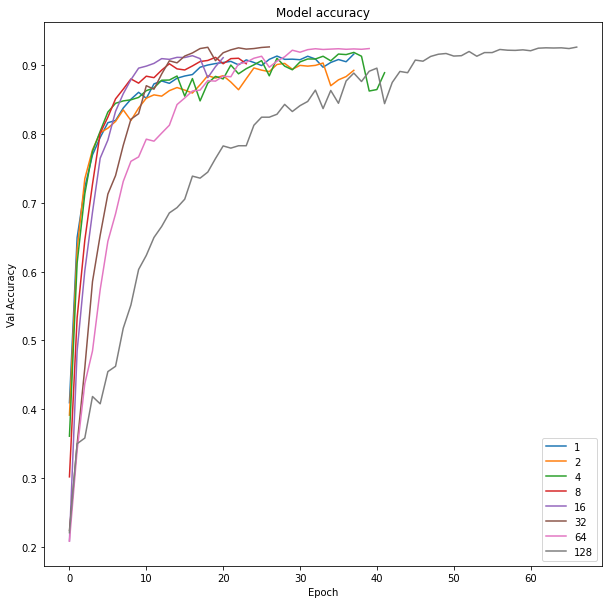

In [ ]:
#Plot training & validation accuracy values
plt.figure(figsize=(10, 10))
plt.plot(storie_a_512[0].history['val_acc'])
plt.plot(storie_a_512[1].history['val_acc'])
plt.plot(storie_a_512[2].history['val_acc'])
plt.plot(storie_a_512[3].history['val_acc'])
plt.plot(storie_a_512[4].history['val_acc'])
plt.plot(storie_a_512[5].history['val_acc'])
plt.plot(storie_a_512[6].history['val_acc'])
plt.plot(storie_a_512[7].history['val_acc'])
#plt.axvline(50, color="grey") # Horizontal line adding the threshold
#plt.axhline(0.92, color="grey") # Horizontal line adding the threshold
plt.title('Model accuracy')
plt.ylabel('Val Accuracy')
plt.xlabel('Epoch')
plt.legend(['1', '2', '4', '8', '16', '32', '64', '128'], loc='lower right')
plt.show()

#Confronti

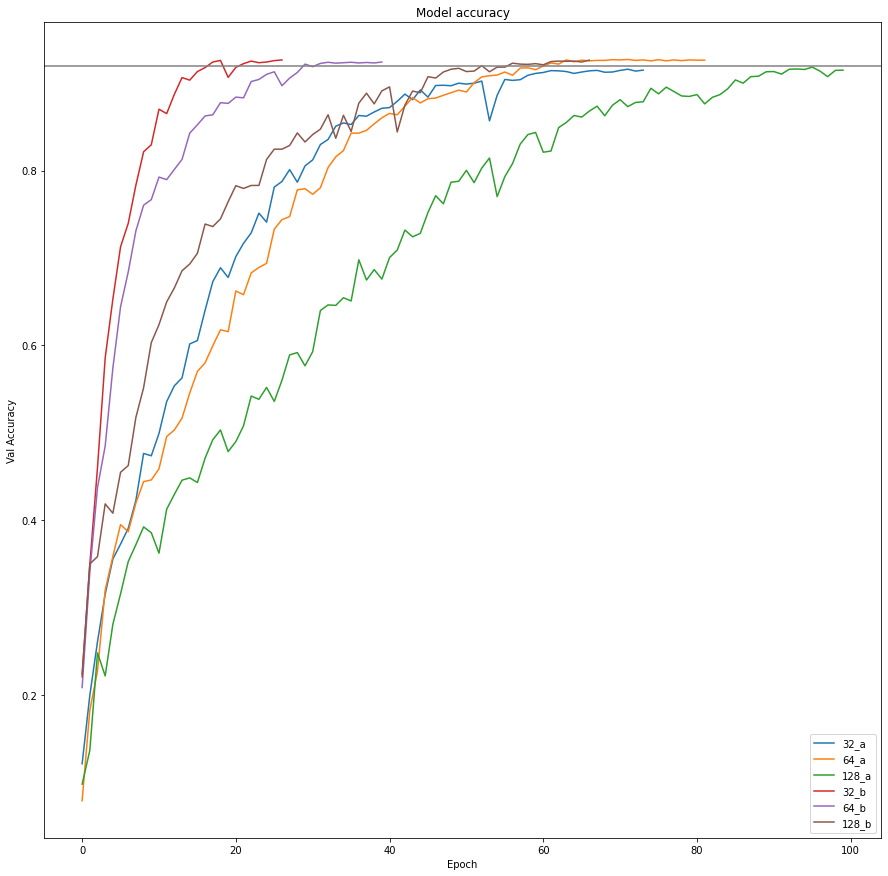

In [ ]:
#Plot training & validation accuracy values
plt.figure(figsize=(15, 15))
plt.plot(storie_a_128[5].history['val_acc'])
plt.plot(storie_a_128[6].history['val_acc'])
plt.plot(storie_a_128[7].history['val_acc'])

plt.plot(storie_a_512[5].history['val_acc'])
plt.plot(storie_a_512[6].history['val_acc'])
plt.plot(storie_a_512[7].history['val_acc'])

plt.axhline(0.92, color="grey") # Horizontal line adding the threshold

plt.title('Model accuracy')
plt.ylabel('Val Accuracy')
plt.xlabel('Epoch')
plt.legend(['32_a', '64_a', '128_a', '32_b', '64_b', '128_b'], loc='lower right')

plt.show()